Explanatory Data Analysis for Cook County Assessor's property information. The ultimate goal is to explore how the standard models overvalue low-priced homes and undervalue high-priced homes and see what can be done to mitigate this bias to make assesmments more fair. In this section I explore the data.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale
#from library.sb_utils import save_file
import statsmodels.api as sm 
from statsmodels.graphics.api import abline_plot 
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split 
from sklearn import linear_model, preprocessing 
import warnings 
warnings.simplefilter(action="ignore", category=FutureWarning)
warnings.filterwarnings(action="ignore", module="scipy", message="^internal gelsd")

In [2]:
bell_2020 = pd.read_csv('../data/bell_cleaned.csv')
bell_sales = pd.read_csv('../data/bell_sales_cleaned.csv')

bell_2020 contains rows for each single residence property in the bell school district. The year column is set to 2020 for each row, which is the year the assesment is for. bell_sales contains rows for each sale of a single residence property in the past eight years. The columns are the same as bell_2020 with the addition of a sale price column.   

In [3]:
bell_sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 293 entries, 0 to 292
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       293 non-null    int64  
 1   meta_pin         293 non-null    int64  
 2   meta_year        293 non-null    float64
 3   meta_class       293 non-null    int64  
 4   meta_sale_price  293 non-null    float64
 5   char_hd_sf       293 non-null    float64
 6   char_age         293 non-null    float64
 7   char_rooms       293 non-null    float64
 8   char_beds        293 non-null    float64
 9   char_frpl        293 non-null    float64
 10  char_fbath       293 non-null    float64
 11  char_hbath       293 non-null    float64
 12  char_bldg_sf     293 non-null    float64
 13  geo_longitude    293 non-null    float64
 14  geo_latitude     293 non-null    float64
dtypes: float64(12), int64(3)
memory usage: 34.5 KB


In [4]:
bell_sales.head()

,Unnamed: 0,meta_pin,meta_year,meta_class,meta_sale_price,char_hd_sf,char_age,char_rooms,char_beds,char_frpl,char_fbath,char_hbath,char_bldg_sf,geo_longitude,geo_latitude
0,126575,13242020170000,2017.0,278,850000.0,3050.0,18.0,8.0,4.0,0.0,2.0,1.0,2340.0,-87.690565,41.953323
1,126576,13242020180000,2013.0,278,1055000.0,3050.0,2.0,9.0,4.0,3.0,3.0,1.0,2639.0,-87.690473,41.953324
2,126578,13242030020000,2013.0,203,330000.0,3137.0,54.0,6.0,3.0,0.0,2.0,0.0,1020.0,-87.690731,41.952804
3,126579,13242030040000,2014.0,202,300000.0,3050.0,116.0,4.0,2.0,0.0,2.0,0.0,680.0,-87.690547,41.952805
4,126580,13242030110000,2018.0,206,976711.0,3660.0,96.0,7.0,4.0,1.0,2.0,1.0,2778.0,-87.689729,41.952810


In [5]:
bell_2020.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 637 entries, 0 to 636
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Unnamed: 0     637 non-null    int64  
 1   meta_pin       637 non-null    int64  
 2   meta_year      637 non-null    float64
 3   meta_class     637 non-null    int64  
 4   char_hd_sf     637 non-null    float64
 5   char_age       637 non-null    float64
 6   char_rooms     637 non-null    float64
 7   char_beds      637 non-null    float64
 8   char_frpl      637 non-null    float64
 9   char_fbath     637 non-null    float64
 10  char_hbath     637 non-null    float64
 11  char_bldg_sf   637 non-null    float64
 12  geo_longitude  637 non-null    float64
 13  geo_latitude   637 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 69.8 KB


In [6]:
bell_2020.head()

,Unnamed: 0,meta_pin,meta_year,meta_class,char_hd_sf,char_age,char_rooms,char_beds,char_frpl,char_fbath,char_hbath,char_bldg_sf,geo_longitude,geo_latitude
0,383981,13242020150000,2020.0,278,3129.0,25.0,10.0,3.0,2.0,3.0,1.0,2166.0,-87.690749,41.953322
1,383982,13242020160000,2020.0,203,3050.0,127.0,4.0,3.0,0.0,1.0,0.0,1077.0,-87.690657,41.953323
2,383983,13242020170000,2020.0,278,3050.0,21.0,8.0,4.0,0.0,2.0,1.0,2340.0,-87.690565,41.953323
3,383984,13242020180000,2020.0,278,3050.0,9.0,9.0,4.0,2.0,3.0,1.0,2639.0,-87.690473,41.953324
4,383987,13242020210000,2020.0,206,3050.0,96.0,7.0,3.0,0.0,2.0,1.0,2350.0,-87.690197,41.953325


meta_class is a categorical variable, indicating if a home is one story or more than one story, age, square footage, and if it is attached or connected.  

In [7]:
bell_sales['meta_class'].value_counts()

278    120
206     68
203     39
205     38
204     10
202      7
208      7
295      4
Name: meta_class, dtype: int64

In [8]:
bell_2020['meta_class'].value_counts()

278    199
206    178
205     96
203     84
204     34
208     19
295     14
202     10
210      2
209      1
Name: meta_class, dtype: int64

Assuming square footage is a good stand in for # of stories and land square footage is a good stand in for the attached vs detached homes, we can drop these categories. We will check this using principle component analysis to be sure that the information provided by these categories are represented by the data. 




In [9]:
bell_2020_class_means= bell_2020.groupby('meta_class').mean()

In [10]:
bell_2020_class_means.head()

,Unnamed: 0,meta_pin,meta_year,char_hd_sf,char_age,char_rooms,char_beds,char_frpl,char_fbath,char_hbath,char_bldg_sf,geo_longitude,geo_latitude
meta_class,,,,,,,,,,,,,
202,403645.500000,1.362170e+13,2020.0,3572.600000,106.000000,4.700000,2.000000,0.000000,1.000000,0.200000,901.400000,-87.687035,41.949829
203,401588.464286,1.358108e+13,2020.0,3756.738095,99.357143,5.785714,2.940476,0.071429,1.202381,0.238095,1337.023810,-87.687031,41.950512
204,409953.735294,1.374457e+13,2020.0,3889.500000,102.029412,7.470588,3.705882,0.352941,1.764706,0.500000,2019.352941,-87.686170,41.951239
205,430088.791667,1.413201e+13,2020.0,3655.895833,114.989583,7.489583,3.802083,0.083333,1.666667,0.531250,1793.552083,-87.682196,41.950513
206,430414.084270,1.413804e+13,2020.0,3807.213483,111.202247,9.056180,4.325843,0.415730,2.595506,0.589888,2764.213483,-87.683521,41.950005


In [11]:
bell_2020_class_means= bell_2020_class_means.drop(['Unnamed: 0','meta_pin','meta_year'],axis=1)

In [12]:
bell_2020_class_columns = bell_2020_class_means.columns


In [13]:
bell_2020_scale = scale(bell_2020_class_means)

In [14]:
bell_2020_scale_df = pd.DataFrame(bell_2020_scale, columns=bell_2020_class_columns)

In [15]:
bell_2020_scale_df.head()

,char_hd_sf,char_age,char_rooms,char_beds,char_frpl,char_fbath,char_hbath,char_bldg_sf,geo_longitude,geo_latitude
0,0.147238,0.678607,-1.662940,-1.714496,-0.828197,-1.050739,-1.529067,-1.288566,-0.979317,-0.262192
1,0.403438,0.522766,-1.125305,-0.841089,-0.690283,-0.905465,-1.419830,-0.965705,-0.977827,0.437130
2,0.588156,0.585457,-0.290973,-0.130266,-0.146738,-0.501815,-0.668823,-0.459999,-0.617795,1.182174
3,0.263131,0.889503,-0.281566,-0.040926,-0.667297,-0.572190,-0.579214,-0.627351,1.043162,0.437905
4,0.473667,0.800652,0.494196,0.445482,-0.025505,0.094553,-0.411072,0.092052,0.489328,-0.081232


In [16]:
bell_2020_class_pca = PCA().fit(bell_2020_scale)

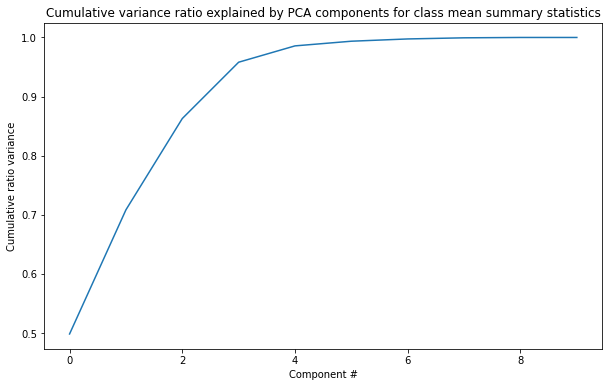

In [17]:
plt.subplots(figsize=(10, 6))
plt.plot(bell_2020_class_pca.explained_variance_ratio_.cumsum())
plt.xlabel('Component #')
plt.ylabel('Cumulative ratio variance')
plt.title('Cumulative variance ratio explained by PCA components for class mean summary statistics');

Graph shows that class categorical variable is well captured by the other columns so I can drop the class column. We need at least 3 components to be over 90% but let's see what it looks like for the forst two.

In [18]:
bell_pca_x = bell_2020_class_pca.transform(bell_2020_scale)

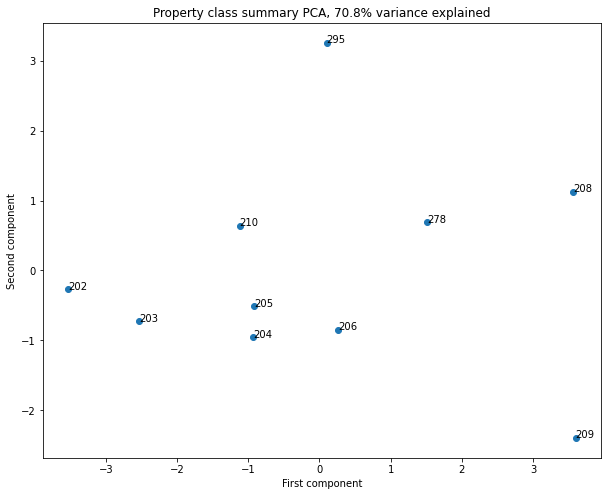

In [19]:
x = bell_pca_x[:, 0]
y = bell_pca_x[:, 1]
meta_class = bell_2020_class_means.index
pc_var = 100 * bell_2020_class_pca.explained_variance_ratio_.cumsum()[1]
plt.subplots(figsize=(10,8))
plt.scatter(x=x, y=y)
plt.xlabel('First component')
plt.ylabel('Second component')
plt.title(f'Property class summary PCA, {pc_var:.1f}% variance explained')
for s, x, y in zip(meta_class, x, y):
    plt.annotate(s, (x, y))

My guess is that the first and second components are composed of combinations of square footage and age. How do I check that for sure?... Now we are ready to drop the class column so that we just have numerical features.

In [20]:
bell_sales = bell_sales.drop(['Unnamed: 0','meta_pin','meta_class'],axis=1)

In [21]:
bell_2020 = bell_2020.drop(['Unnamed: 0','meta_pin','meta_class'],axis=1)

In [22]:
bell_sales.head()

,meta_year,meta_sale_price,char_hd_sf,char_age,char_rooms,char_beds,char_frpl,char_fbath,char_hbath,char_bldg_sf,geo_longitude,geo_latitude
0,2017.0,850000.0,3050.0,18.0,8.0,4.0,0.0,2.0,1.0,2340.0,-87.690565,41.953323
1,2013.0,1055000.0,3050.0,2.0,9.0,4.0,3.0,3.0,1.0,2639.0,-87.690473,41.953324
2,2013.0,330000.0,3137.0,54.0,6.0,3.0,0.0,2.0,0.0,1020.0,-87.690731,41.952804
3,2014.0,300000.0,3050.0,116.0,4.0,2.0,0.0,2.0,0.0,680.0,-87.690547,41.952805
4,2018.0,976711.0,3660.0,96.0,7.0,4.0,1.0,2.0,1.0,2778.0,-87.689729,41.952810


In [23]:
bell_2020.head()

,meta_year,char_hd_sf,char_age,char_rooms,char_beds,char_frpl,char_fbath,char_hbath,char_bldg_sf,geo_longitude,geo_latitude
0,2020.0,3129.0,25.0,10.0,3.0,2.0,3.0,1.0,2166.0,-87.690749,41.953322
1,2020.0,3050.0,127.0,4.0,3.0,0.0,1.0,0.0,1077.0,-87.690657,41.953323
2,2020.0,3050.0,21.0,8.0,4.0,0.0,2.0,1.0,2340.0,-87.690565,41.953323
3,2020.0,3050.0,9.0,9.0,4.0,2.0,3.0,1.0,2639.0,-87.690473,41.953324
4,2020.0,3050.0,96.0,7.0,3.0,0.0,2.0,1.0,2350.0,-87.690197,41.953325


We treat meta_year like any other feature.


                 meta_year  meta_sale_price  char_hd_sf  char_age  char_rooms  \
meta_year         1.000000         0.136541    0.013024 -0.027671    0.122939   
meta_sale_price   0.136541         1.000000    0.194794 -0.488448    0.430656   
char_hd_sf        0.013024         0.194794    1.000000  0.012759    0.204798   
char_age         -0.027671        -0.488448    0.012759  1.000000   -0.277316   
char_rooms        0.122939         0.430656    0.204798 -0.277316    1.000000   
char_beds         0.076447         0.579329    0.118729 -0.247407    0.643321   
char_frpl        -0.004363         0.530681    0.066719 -0.487331    0.157890   
char_fbath        0.119658         0.620605    0.103602 -0.494720    0.567471   
char_hbath        0.120796         0.486783    0.072851 -0.419292    0.337710   
char_bldg_sf      0.144039         0.797679    0.183092 -0.500689    0.668729   
geo_longitude     0.054427         0.298108   -0.171653  0.249956   -0.042846   
geo_latitude      0.030640  

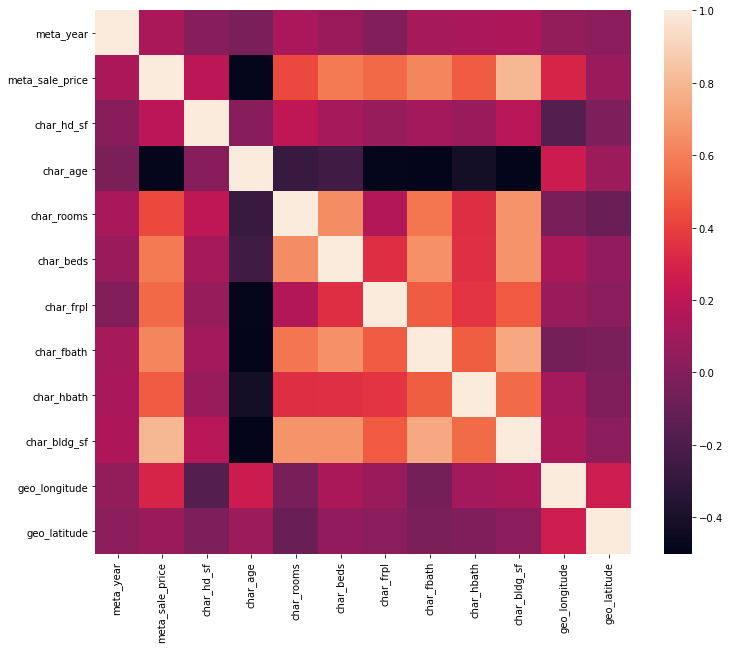

In [24]:
plt.subplots(figsize=(12,10))
print(bell_sales.corr())
sns.heatmap(bell_sales.corr());

Price is most strongly correlated with building square footage. The next most correlated feature is # of full bathrooms. But that is also highly correlated with bulidinmg square footage. 

In [25]:
def scatterplots(columns, ncol=None, figsize=(15, 8)):
    if ncol is None:
        ncol = len(columns)
    nrow = int(np.ceil(len(columns) / ncol))
    fig, axes = plt.subplots(nrow, ncol, figsize=figsize, squeeze=False)
    fig.subplots_adjust(wspace=0.5, hspace=0.6)
    for i, col in enumerate(columns):
        ax = axes.flatten()[i]
        ax.scatter(x = col, y = 'meta_sale_price', data=bell_sales, alpha=0.5)
        ax.set(xlabel=col, ylabel='Sale Price')
    nsubplots = nrow * ncol    
    for empty in range(i+1, nsubplots):
        axes.flatten()[empty].set_visible(False)

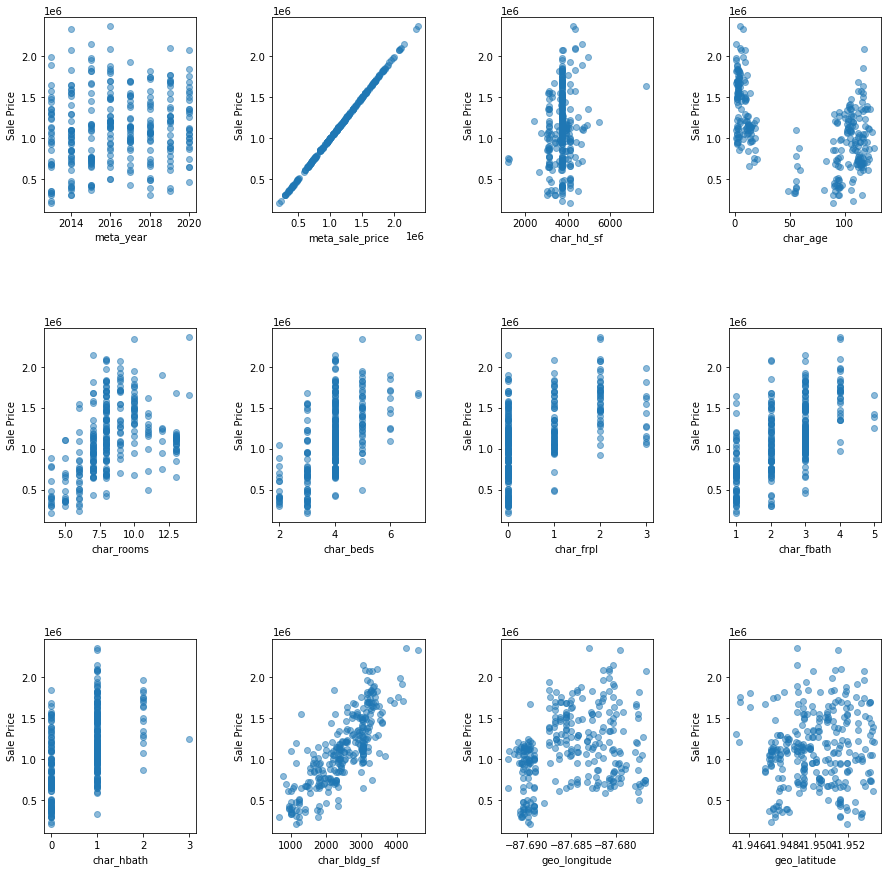

In [26]:
scatterplots(bell_sales.columns, ncol=4, figsize=(15, 15))

bldg_sf is the most highly correlated.  Some of the other variables only take a few values and might need to be treated as categories. One can see from the age graph the amount of flipping that is happening. 

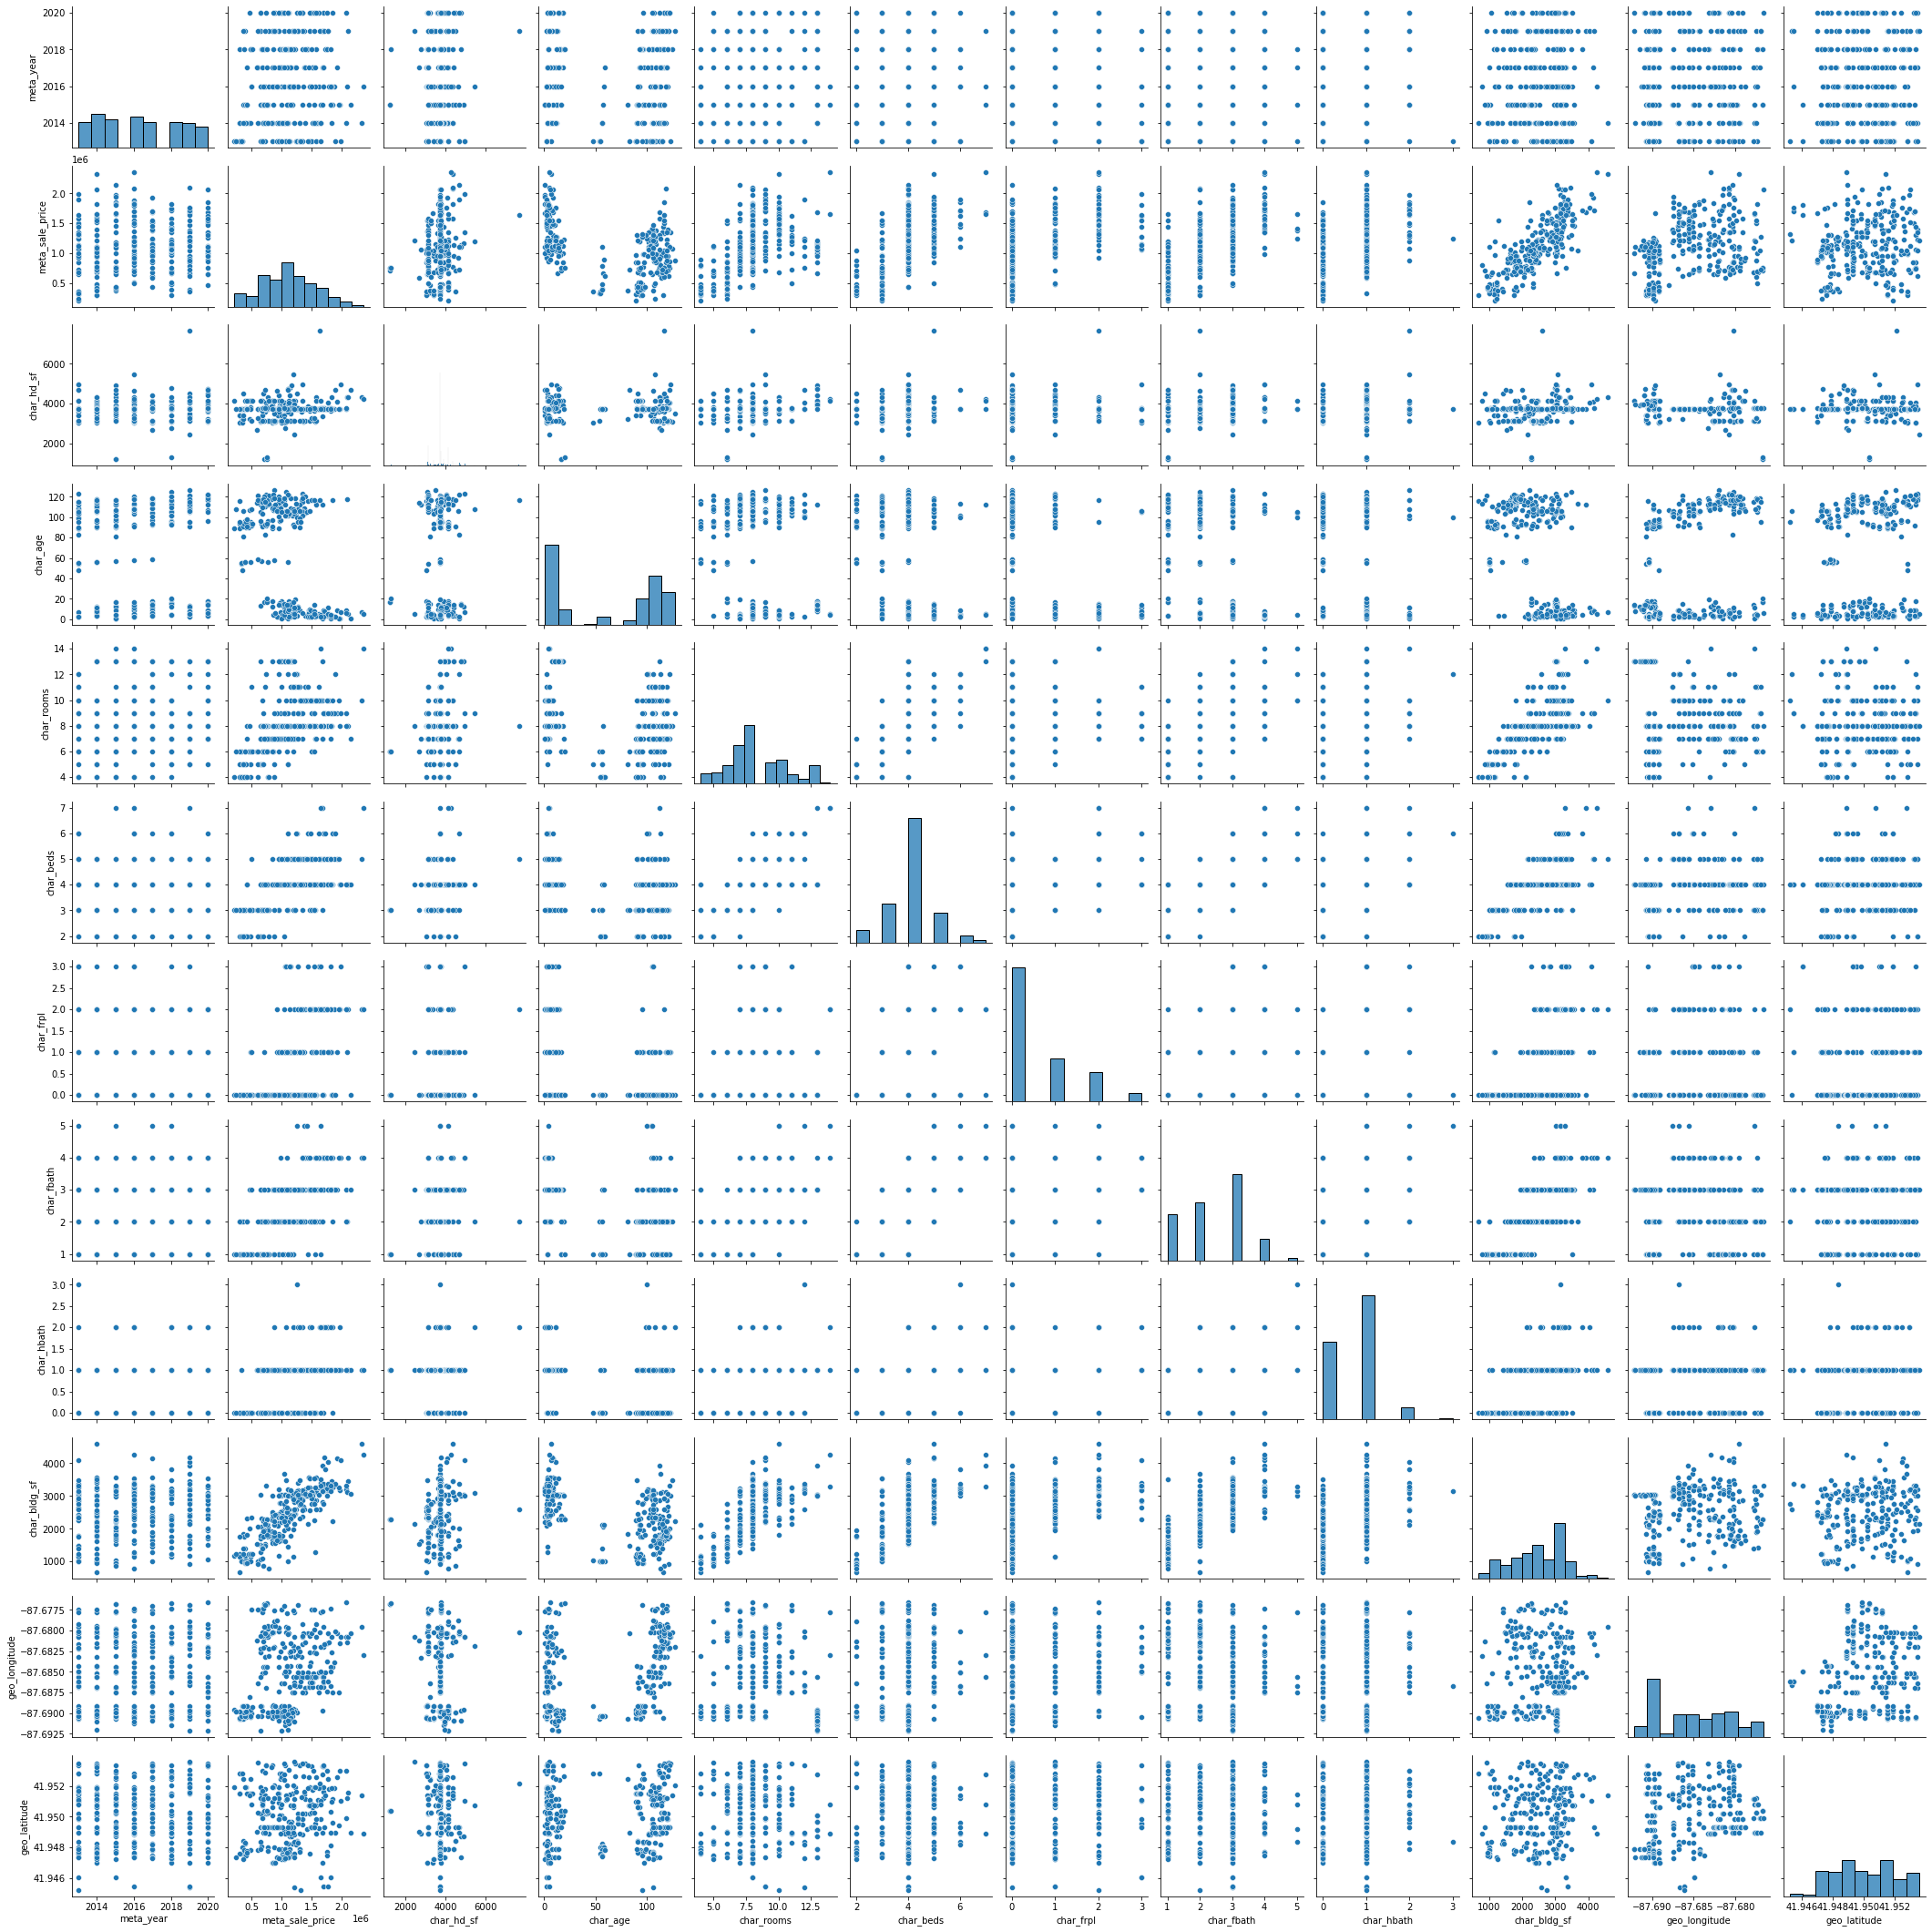

In [27]:
sns.pairplot(bell_sales)

Diagonal histogram shows the variables that take on ony a few values. 
Just for fun, quick least squares using just bldg square footage.

<AxesSubplot:xlabel='char_bldg_sf', ylabel='meta_sale_price'>

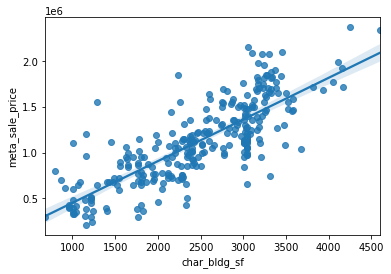

In [28]:
sns.regplot(y='meta_sale_price',x='char_bldg_sf',data=bell_sales)

In [29]:
slope,intercept= np.polyfit(bell_sales['char_bldg_sf'],bell_sales['meta_sale_price'],1)

In [30]:
slope*1160+intercept

524843.840235857

In [31]:
slope*1853+intercept

839602.143138649

Text(0, 0.5, 'actual price')

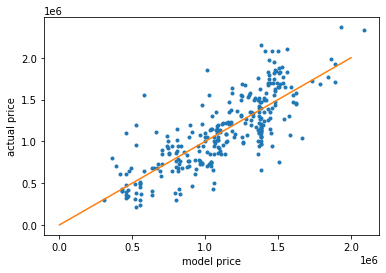

In [32]:
plt.plot(bell_sales['char_bldg_sf']*slope + intercept,bell_sales['meta_sale_price'],marker='.',linestyle='none')
plt.plot([0,2000000],[0,2000000])
plt.xlabel('model price')
plt.ylabel('actual price')

Down at the very low end around 0.5 million there appear to be more points below the line than above. After 1.5 million, there appear to be more above than below. Will need to explore this quantitatively as we improve the model.